## Observations and Insights

Needed to consider that not every single mouse survived until the end of the study. Therefore the data presented is based on the mice which did survive. Perhaps another layer could be added in to determine the survivability rate of mice based on the drug regimen. This way, you could balance out the decrease in Tumor Volume to the Survival Rate of mice for risk analysis

Based on the box plots presented, there were no outliers, which may seem good, but I still found a bit strange. Perhaps the sample size is not yet big enough to get a good enough scope for this kind of drug trial. Another reason is because it also did not take into consideration the weight of the mice which had not survived. Perhaps if this was added into the boxplot, we may have seen some outliers where the tumor volume did not decrease, but instead increased, at which point the final tumor volume for that particular mouse would be much higher than those which completed the trial and survived.

I found it odd to calculate and plot the many mice's weights to the average final weight which would essentially be a straight line. Therefore I chose to plot the mice's weights (throughout the Timepoints) against their same Tumor Volumes. This way, you can see multiple data points, and thus pointing to the fact that the larger a mouse is, the larger the potential for them to have higher tumor volume, should they develop one. 





## Dependencies and starter code

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress



# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#print(mouse_metadata.head())
#print(study_results.head())

# Combine the data into a single dataset

combine_study_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
combine_study_df

combine_study_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_data = combine_study_df.groupby(["Drug Regimen", "Timepoint"])

regimen_data.head()


mean_tumor = regimen_data["Tumor Volume (mm3)"].mean()
median_tumor = regimen_data["Tumor Volume (mm3)"].median()
var_tumor = regimen_data["Tumor Volume (mm3)"].var()
std_tumor = regimen_data["Tumor Volume (mm3)"].std()
sem_tumor = regimen_data["Tumor Volume (mm3)"].sem()

new_regimen_data = pd.DataFrame({"Mean" : mean_tumor,
                                 "Median" : median_tumor,
                                 "Variance" : var_tumor,
                                 "Standard Deviation" : std_tumor,
                                 "SEM" : sem_tumor
                                })

#print(mean_tumor)
#print("-----------")
#print(median_tumor)
#print("-----------")
#print(var_tumor)
#print("-----------")
#print(std_tumor)
#print("-----------")
#print(sem_tumor)

new_regimen_data

Mean     Median   Variance  Standard Deviation  \
Drug Regimen Timepoint                                                        
Capomulin    0          45.000000  45.000000   0.000000            0.000000   
             5          44.266086  45.597064   5.030889            2.242964   
             10         43.084291  43.421014  12.344133            3.513422   
             15         42.064317  42.798160  16.878693            4.108369   
             20         40.716325  40.716428  19.035028            4.362915   
...                           ...        ...        ...                 ...   
Zoniferol    25         55.432935  55.676604   5.808348            2.410052   
             30         57.713531  57.419744   9.601024            3.098552   
             35         60.089372  60.365832  10.876760            3.297993   
             40         62.916692  62.274543  13.958456            3.736102   
             45         65.960888  65.684689  14.100301            3.755037   

                             SEM  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731  
...                          ...  
Zoniferol    25         0.602513  
             30         0.800043  
             35         0.881426  
             40         0.998515  
             45         1.003576  

[100 rows x 5 columns]

## Bar plots

Text(0, 0.5, 'Count')

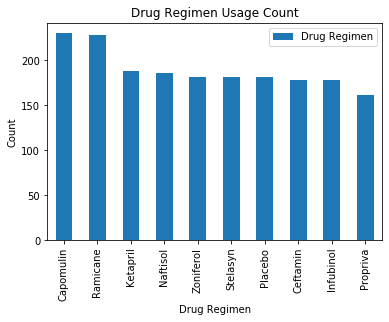

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

count_regimen = combine_study_df["Drug Regimen"].value_counts()

count_df = pd.DataFrame(count_regimen)

count_df

panda_bar = count_df.plot(y="Drug Regimen", kind = "bar", rot=90, align="center")

plt.title("Drug Regimen Usage Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")




Text(0, 0.5, 'Count')

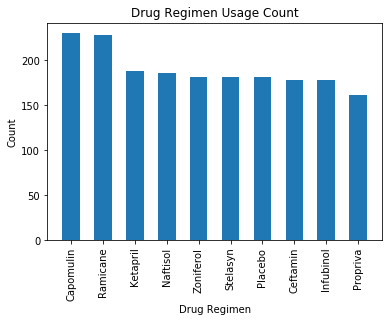

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

new_count_df = count_df.reset_index()
#print(new_count_df)

y_axis = new_count_df["Drug Regimen"]
x_axis = np.arange(len(y_axis))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, new_count_df["index"], rotation="vertical")

plt.bar(tick_locations, y_axis, width=0.55, align="center")

plt.title("Drug Regimen Usage Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

## Pie plots

Text(0.5, 1.0, 'Female vs Male Mice in Study')

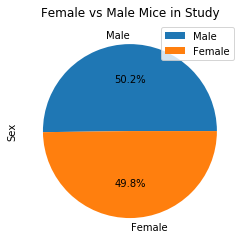

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#print(mouse_metadata)

gender = pd.DataFrame(mouse_metadata["Sex"].value_counts())

gender = gender.reset_index()

gender

plot = gender.plot(y="Sex", labels=gender["index"], kind = "pie", autopct="%1.1f%%", figsize=(4, 4))

plt.title("Female vs Male Mice in Study")


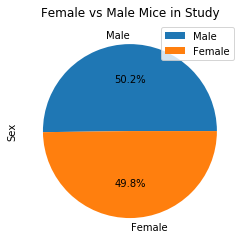

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(gender["Sex"], labels=gender["index"], autopct="%1.1f%%", startangle=0)
plt.title("Female vs Male Mice in Study")
plt.ylabel("Sex")
plt.legend(loc="upper right")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

##### =======ASSUMPTION: At the end of the day, the tumor volumes we need to assess are those of the mice which survived until
#####                    the end of the study. That being said, if we were to actually find the total number of mice over every
#####                    drug regimen, we would find that the total mice at Timepoint 45 (end of the study) is less than 249 --
#####                    the number of mice we had at the beginning of the study.
#####                    Of course, there could be many reasons for this (other underlying health issues, accidents, etc) which
#####                    could cause this, but for the purposes of this assignment, I will only be conducting the analysis on 
#####                    the mice which survived the entire study period.

####     RANK THE REGIMENS BASED ON END AVERAGE TUMOR SIZE
new_regimen_data_df = new_regimen_data.reset_index()

pivot_new_regimen_data = new_regimen_data_df.pivot(index="Drug Regimen", columns="Timepoint")["Mean"]

pivot_new_regimen_data

top_regimen = pivot_new_regimen_data.sort_values(45)
top_regimen




Timepoint,0,5,10,15,20,25,30,35,40,45
Drug Regimen,,,,,,,,,,
Ramicane,45.0,43.944859,42.531957,41.495061,40.238325,38.974300,38.703137,37.451996,36.574081,34.955595
Capomulin,45.0,44.266086,43.084291,42.064317,40.716325,39.939528,38.769339,37.816839,36.958001,36.236114
Ceftamin,45.0,46.503051,48.285125,50.094055,52.157049,54.287674,56.769517,58.827548,61.467895,64.132421
Infubinol,45.0,46.541247,49.403909,51.296397,53.197691,55.715252,58.299397,60.742461,63.162824,65.755562
Zoniferol,45.0,46.851818,48.689881,50.779059,53.170334,55.432935,57.713531,60.089372,62.916692,65.960888
Propriva,45.0,47.248967,49.101541,51.067318,53.346737,55.504138,58.196374,60.350199,63.045537,66.258529
Placebo,45.0,47.125589,49.423329,51.359742,54.364417,57.482574,59.809063,62.420615,65.052675,68.084082
Stelasyn,45.0,47.470830,49.335368,51.448025,53.970080,56.172821,59.870528,62.432021,65.356386,68.438310
Naftisol,45.0,46.796098,48.694210,50.933018,53.644087,56.731968,59.559509,62.685087,65.600754,69.265506


In [8]:
####     FILTER FOR ALL MOUSE ID'S WHICH ARE WITHIN THE TOP 4 DRUG REGIMENS


'''
mouse_topfour = combine_study_df.loc[(combine_study_df["Drug Regimen"] == "Ramicane")   |
                                      (combine_study_df["Drug Regimen"] == "Capomulin") |
                                      (combine_study_df["Drug Regimen"] == "Ceftamin")  |
                                      (combine_study_df["Drug Regimen"] == "Infubinol") ,                 
                                      :]

####    DETERMINE THE MOUSE IDs WHICH MADE IT TO TIMEPOINT 45 (END OF STUDY), AND DETERMINE FINAL TUMOR VOLUME

mouse_topfour_final = mouse_topfour.loc[mouse_topfour["Timepoint"]== 45, :]

mouse_topfour_final = mouse_topfour_final[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mouse_topfour_final.reset_index(drop=True)

tumor_vol = mouse_topfour_final["Tumor Volume (mm3)"]

####    DETERMINE THE MOUSE IDs WHICH MADE IT TO TIMEPOINT 45 (END OF STUDY), AND DETERMINE FINAL TUMOR VOLUME

mouse_topfour_final = mouse_topfour.loc[mouse_topfour["Timepoint"]== 45, :]

mouse_topfour_final = mouse_topfour_final[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mouse_topfour_final.reset_index(drop=True)

tumor_vol = mouse_topfour_final["Tumor Volume (mm3)"]
'''



capomulin = combine_study_df.loc[(combine_study_df["Drug Regimen"] == "Capomulin")]                                                      
capomulin = capomulin.loc[(capomulin["Timepoint"] == 45)]
capomulin = capomulin[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
capo_min = capomulin["Tumor Volume (mm3)"].min()
capo_max = capomulin["Tumor Volume (mm3)"].max()

ramicane = combine_study_df.loc[(combine_study_df["Drug Regimen"] == "Ramicane")]                                                      
ramicane = ramicane.loc[(ramicane["Timepoint"] == 45)]
ramicane = ramicane[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
rami_min = ramicane["Tumor Volume (mm3)"].min()
rami_max = ramicane["Tumor Volume (mm3)"].max()

ceftamin = combine_study_df.loc[(combine_study_df["Drug Regimen"] == "Ceftamin")]                                                      
ceftamin = ceftamin.loc[(ceftamin["Timepoint"] == 45)]
ceftamin = ceftamin[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
ceft_min = ceftamin["Tumor Volume (mm3)"].min()
ceft_max = ceftamin["Tumor Volume (mm3)"].max()

infubinol = combine_study_df.loc[(combine_study_df["Drug Regimen"] == "Infubinol")]                                                      
infubinol = infubinol.loc[(infubinol["Timepoint"] == 45)]
infubinol = infubinol[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
infu_min = infubinol["Tumor Volume (mm3)"].min()
infu_max = infubinol["Tumor Volume (mm3)"].max()

####     FIND THE QUARTILE INFORMATION

##########################################################################################################

quartiles = capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("=====================================================")
print("                      Capomulin Quartile and Outliers")
print("=====================================================")
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")
print("=====================================================")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("=====================================================")

####    DETERMINE WHAT OUR MIN AND MAX IS, AND IF IT FALLS INSIDE OR OUTSIDE OF OUR LOWER/UPPER BOUND

print(f"Minimum tumor volume is {capo_min}")
print(f"Maximum tumor volume is {capo_max}")
print("=====================================================")
print("There are no outliers in the dataset.")

##########################################################################################################

quartiles = ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("=====================================================")
print("                       Ramicane Quartile and Outliers")
print("=====================================================")
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")
print("=====================================================")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("=====================================================")

####    DETERMINE WHAT OUR MIN AND MAX IS, AND IF IT FALLS INSIDE OR OUTSIDE OF OUR LOWER/UPPER BOUND

print(f"Minimum tumor volume is {rami_min}")
print(f"Maximum tumor volume is {rami_max}")
print("=====================================================")
print("There are no outliers in the dataset.")

##########################################################################################################

quartiles = ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("=====================================================")
print("                       Ceftamin Quartile and Outliers")
print("=====================================================")
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")
print("=====================================================")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("=====================================================")

####    DETERMINE WHAT OUR MIN AND MAX IS, AND IF IT FALLS INSIDE OR OUTSIDE OF OUR LOWER/UPPER BOUND

print(f"Minimum tumor volume is {ceft_min}")
print(f"Maximum tumor volume is {ceft_max}")
print("=====================================================")
print("There are no outliers in the dataset.")

##########################################################################################################

quartiles = infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("=====================================================")
print("                       Infubinol Quartile and Outliers")
print("=====================================================")
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")
print("=====================================================")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("=====================================================")

####    DETERMINE WHAT OUR MIN AND MAX IS, AND IF IT FALLS INSIDE OR OUTSIDE OF OUR LOWER/UPPER BOUND

print(f"Minimum tumor volume is {infu_min}")
print(f"Maximum tumor volume is {infu_max}")
print("=====================================================")
print("There are no outliers in the dataset.")


                      Capomulin Quartile and Outliers
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volumes is: 7.781863460000004
The the median of tumor volume is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Minimum tumor volume is 23.34359787
Maximum tumor volume is 47.68596303
There are no outliers in the dataset.
                       Ramicane Quartile and Outliers
The lower quartile of tumor volume is: 30.981175224999998
The upper quartile of tumor volume is: 38.508305307499995
The interquartile range of tumor volume is: 7.527130082499998
The the median of tumor volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.
Minimum tumor volume is 22.05012627
Maximum tumor volume is 45.22086888
There are no outliers in the dataset.
                       Ceftamin 

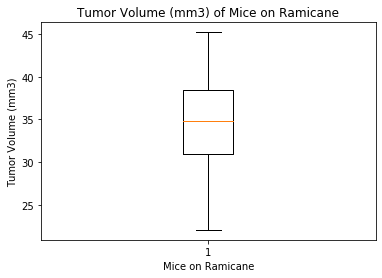

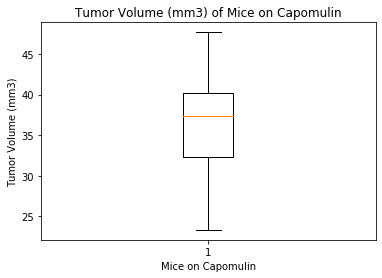

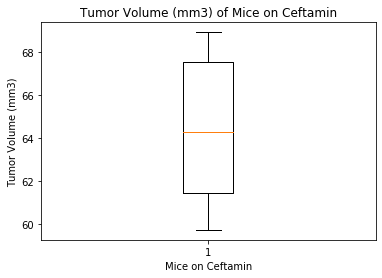

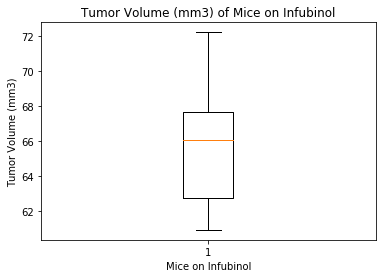

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume (mm3) of Mice on Ramicane")
ax1.set_xlabel('Mice on Ramicane')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ramicane["Tumor Volume (mm3)"])
plt.show()


fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume (mm3) of Mice on Capomulin")
ax1.set_xlabel('Mice on Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin["Tumor Volume (mm3)"])
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume (mm3) of Mice on Ceftamin")
ax1.set_xlabel('Mice on Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ceftamin["Tumor Volume (mm3)"])
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume (mm3) of Mice on Infubinol")
ax1.set_xlabel('Mice on Infubinol')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(infubinol["Tumor Volume (mm3)"])
plt.show()



## Line and scatter plots

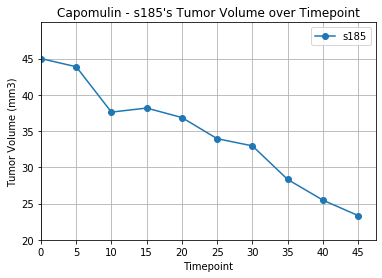

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

####     GET DATA FOR A SINGLE MOUSE WITHIN CAPOMULIN
mouse_capo = combine_study_df.loc[(combine_study_df["Drug Regimen"] == "Capomulin")]
mouse_capo = mouse_capo.loc[(mouse_capo["Mouse ID"] == "s185")]
mouse_capo.reset_index(drop = True)
mouse_capo

####     LINE PLOT CREATION

timepoint = mouse_capo["Timepoint"]
volume = mouse_capo["Tumor Volume (mm3)"]

plt.plot(timepoint,volume,marker ='o',label="s185")

plt.title("Capomulin - s185's Tumor Volume over Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper right")
plt.xlim(0, 47.5)
plt.ylim(20, 50)
plt.xticks(timepoint, timepoint)
plt.yticks(np.arange(20, 50, step=5))

plt.grid()



plt.show()

([<matplotlib.axis.YTick at 0x1e1416f2f88>,
 <a list of 12 Text yticklabel objects>)

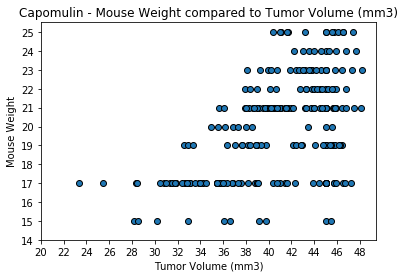

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


##### =======ASSUMPTION: It doesn't make sense to have each individual mouse weight, graphed against the average tumor volume
#####                    As there would only be one average. Therefore, I am instead showing what each mouse weight was, in 
#####                    comparison to the tumor volume of that time point. Overall, this would be more beneficial if viewing 
#####                    a scatter plot.

wgt_vol_capo = combine_study_df.loc[(combine_study_df["Drug Regimen"] == "Capomulin")]
wgt_vol_capo

volume = wgt_vol_capo["Tumor Volume (mm3)"]
weight = wgt_vol_capo["Weight (g)"]
#print(wgt_vol_capo["Tumor Volume (mm3)"].min())
#print(wgt_vol_capo["Tumor Volume (mm3)"].max())

plt.scatter(volume, weight, marker="o", edgecolors="black")

plt.title("Capomulin - Mouse Weight compared to Tumor Volume (mm3)")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight")

plt.xticks(np.arange(20, 50, step=2))
plt.yticks(np.arange(14, 26, step=1))


The correlation between both Weight and Tumor Volume is 0.53


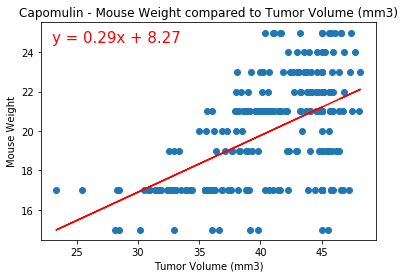

In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = volume
y_values = weight

correlation = sts.pearsonr(x_values,y_values)

print(f"The correlation between both Weight and Tumor Volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(23,24.5),fontsize=15,color="red")

plt.title("Capomulin - Mouse Weight compared to Tumor Volume (mm3)")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight")
plt.show()





